In [2]:
import pandas as pd 

data = ["satu","satu","dua","tiga","empat","empat"]
series = pd.Series(data)
series

0     satu
1     satu
2      dua
3     tiga
4    empat
5    empat
dtype: object

In [3]:
series.duplicated()

0    False
1     True
2    False
3    False
4    False
5     True
dtype: bool

In [4]:
series.duplicated(keep = "last")

0     True
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [5]:
series.duplicated(keep = False)

0     True
1     True
2    False
3    False
4     True
5     True
dtype: bool

In [6]:
series.drop_duplicates()

0     satu
2      dua
3     tiga
4    empat
dtype: object

In [7]:
series.drop_duplicates(keep = "last")

1     satu
2      dua
3     tiga
5    empat
dtype: object

In [8]:
series.drop_duplicates(keep = False)

2     dua
3    tiga
dtype: object

In [9]:
frame = {
    "name" : ["agung", "fafa", "agung", "emi", "william"],
    "course" : ["analis", "marketing", "analis", "statistik", "analis"]
}

df = pd.DataFrame(frame)
df

,name,course
0,agung,analis
1,fafa,marketing
2,agung,analis
3,emi,statistik
4,william,analis


In [10]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [11]:
df.duplicated(subset=["course"])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [12]:
df = df.set_index("name")
df

,course
name,
agung,analis
fafa,marketing
agung,analis
emi,statistik
william,analis


COMBINING DATA

In [13]:
data_2017 = pd.read_csv("user_age_2017.csv")
data_2018 = pd.read_csv("user_age_2018.csv")

data_2017

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017


In [14]:
data_2018

,userid,date
0,11,1/1/2018
1,12,1/2/2018
2,13,1/3/2018


In [15]:
df_combine = pd.concat([data_2017, data_2018], ignore_index=True)
df_combine

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017
3,11,1/1/2018
4,12,1/2/2018
5,13,1/3/2018


In [16]:
df_combine["date"] = pd.to_datetime(df_combine["date"])
df_combine

,userid,date
0,7,2017-01-01
1,8,2017-01-02
2,9,2017-01-03
3,11,2018-01-01
4,12,2018-01-02
5,13,2018-01-03


In [17]:
from datetime import datetime

tanggal = datetime.now()

df_combine['age'] = (tanggal - df_combine['date']).dt.days

df_combine

,userid,date,age
0,7,2017-01-01,2882
1,8,2017-01-02,2881
2,9,2017-01-03,2880
3,11,2018-01-01,2517
4,12,2018-01-02,2516
5,13,2018-01-03,2515


In [18]:
bins = [0, 2560, 2900]

labels = ['muda', 'tua']

df_combine['age_bin'] = pd.cut(df_combine['age'], bins = bins, labels = labels)

df_combine

,userid,date,age,age_bin
0,7,2017-01-01,2882,tua
1,8,2017-01-02,2881,tua
2,9,2017-01-03,2880,tua
3,11,2018-01-01,2517,muda
4,12,2018-01-02,2516,muda
5,13,2018-01-03,2515,muda


VISUALISASI

In [19]:
jantung = pd.read_csv("penyakit_jantung.csv")
source = jantung[["sex", "age", "cp", "trestbps", "chol"]]
source.head()

,sex,age,cp,trestbps,chol
0,female,63,3,145,233
1,female,37,2,130,250
2,male,41,1,130,204
3,female,56,1,120,236
4,male,57,0,120,354


In [20]:
group = source.groupby("age")["age"].count()
group.head()

age
29    1
34    2
35    4
37    2
38    3
Name: age, dtype: int64

MATPLOTLIB

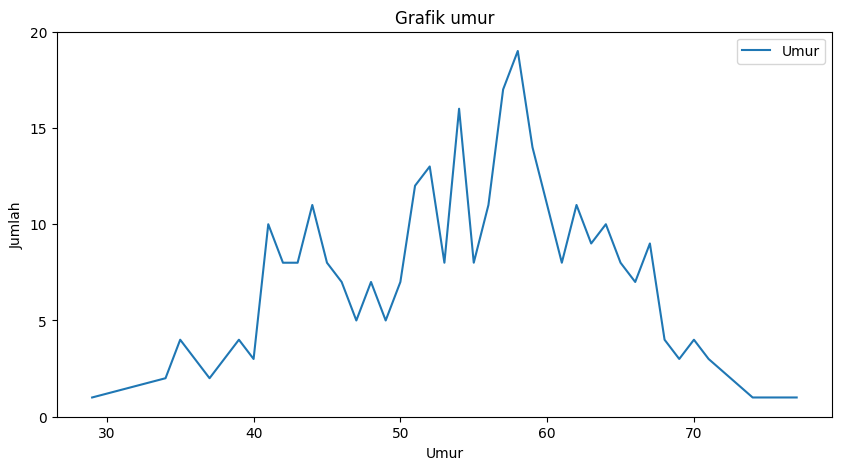

In [21]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5)) # (lebar, tinggi)
plt.plot(group.index, group.values, label = "Umur") # (x , y)
plt.title("Grafik umur")
plt.ylabel("Jumlah")
plt.xlabel("Umur")
plt.yticks([0, 5, 10, 15, 20])
plt.legend()
plt.show()

In [22]:
gender = source.groupby("sex")["sex"].count()
gender.head()

sex
female    207
male       96
Name: sex, dtype: int64

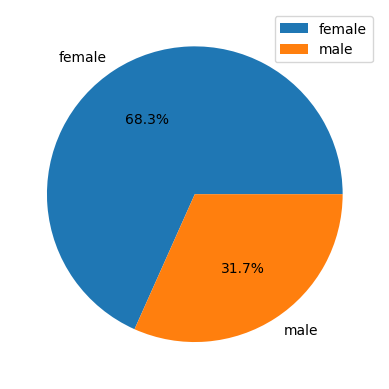

In [23]:
plt.pie(gender.values, labels = gender.index, autopct="%1.1f%%")

plt.legend()
plt.show()

SEABORN

In [24]:
import seaborn as sns 

In [25]:
source

,sex,age,cp,trestbps,chol
0,female,63,3,145,233
1,female,37,2,130,250
2,male,41,1,130,204
3,female,56,1,120,236
4,male,57,0,120,354
...,...,...,...,...,...
298,male,57,0,140,241
299,female,45,3,110,264
300,female,68,0,144,193
301,female,57,0,130,131


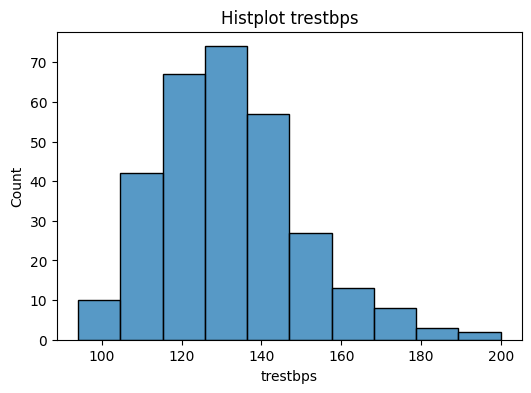

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(x = "trestbps", data = source, bins = 10)
plt.title("Histplot trestbps")
plt.show()

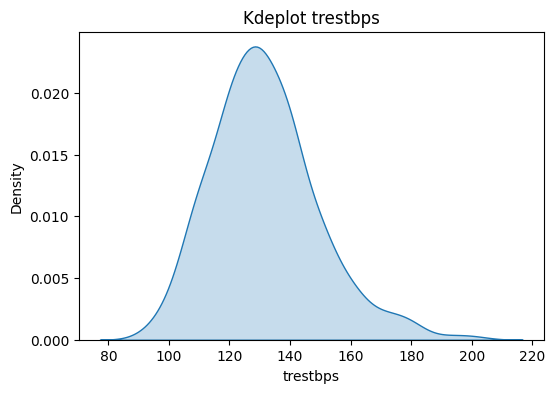

In [27]:
plt.figure(figsize=(6,4))
sns.kdeplot(x = "trestbps", data = source, fill=True)
plt.title("Kdeplot trestbps")
plt.show()

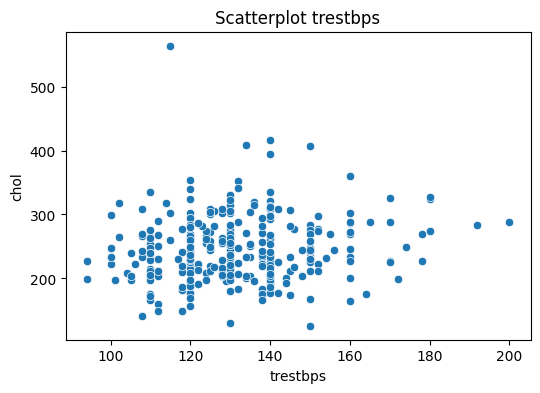

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = "trestbps", y = "chol" ,data = source)
plt.title("Scatterplot trestbps")
plt.show()

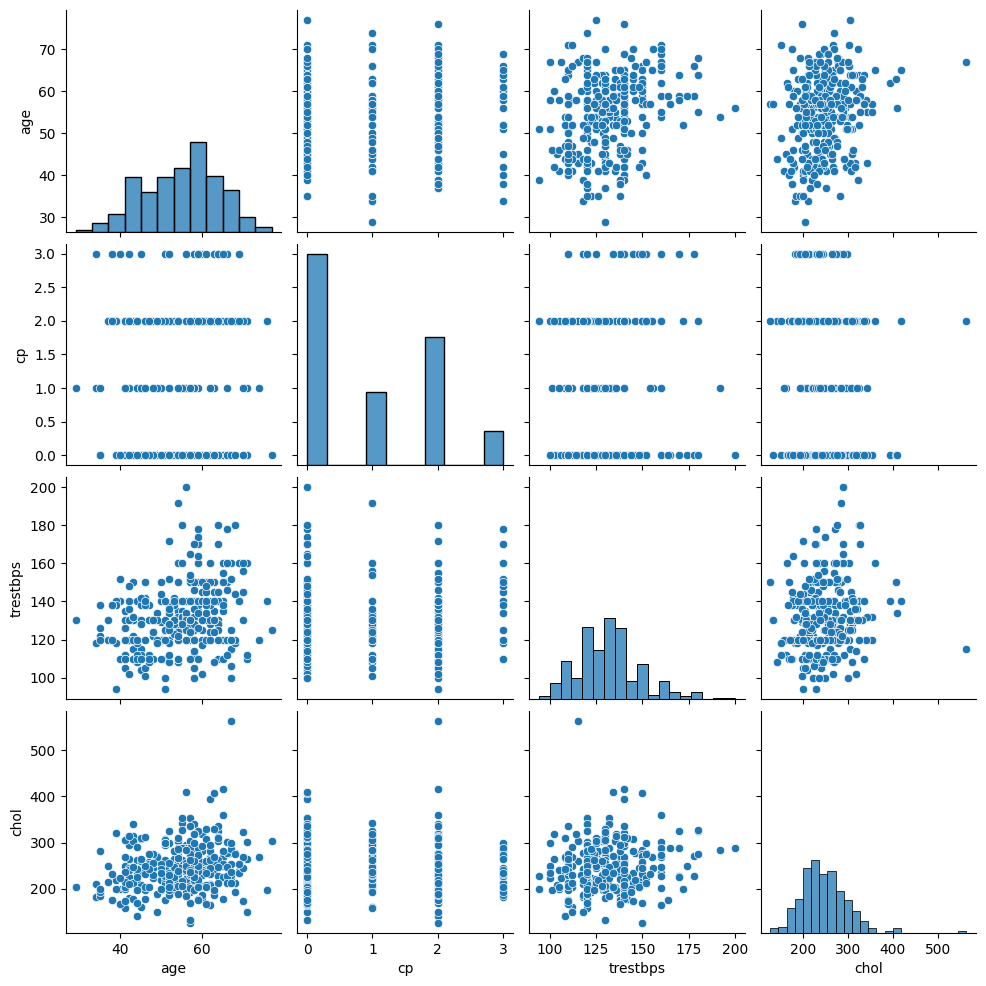

In [29]:
sns.pairplot(data = source)
plt.show()

In [30]:
source

,sex,age,cp,trestbps,chol
0,female,63,3,145,233
1,female,37,2,130,250
2,male,41,1,130,204
3,female,56,1,120,236
4,male,57,0,120,354
...,...,...,...,...,...
298,male,57,0,140,241
299,female,45,3,110,264
300,female,68,0,144,193
301,female,57,0,130,131


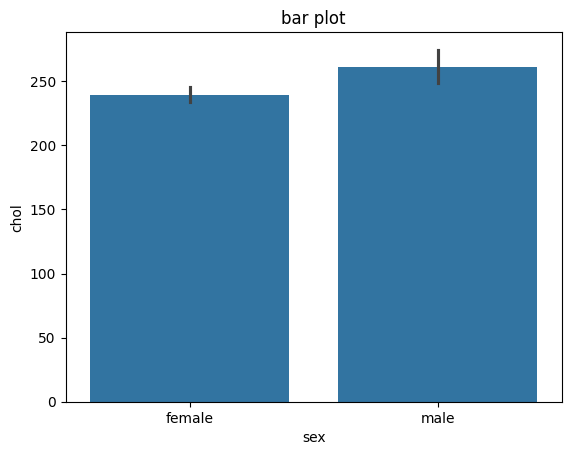

In [31]:
sns.barplot(x = "sex", y = "chol", data = source)
plt.title("bar plot")
plt.show()

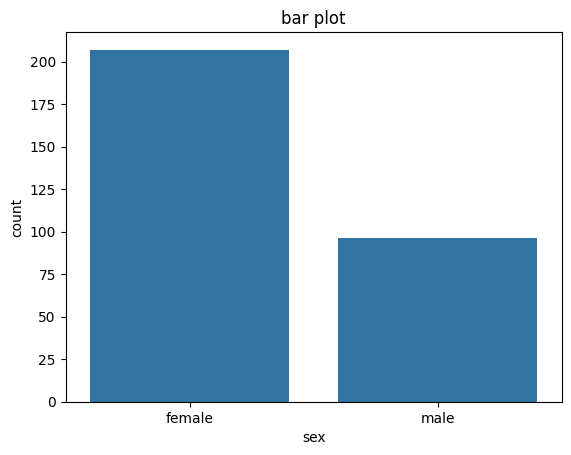

In [32]:
sns.countplot(x = "sex", data = source)
plt.title("bar plot")
plt.show()

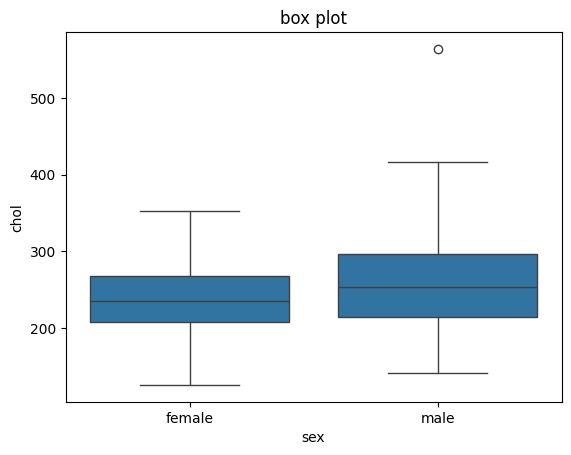

In [33]:
sns.boxplot(x = "sex", y = "chol", data = source)
plt.title("box plot")
plt.show()

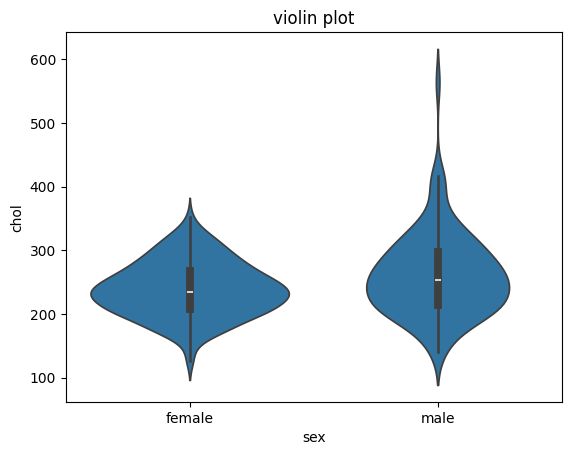

In [34]:
sns.violinplot(x = "sex", y = "chol", data = source)
plt.title("violin plot")
plt.show()

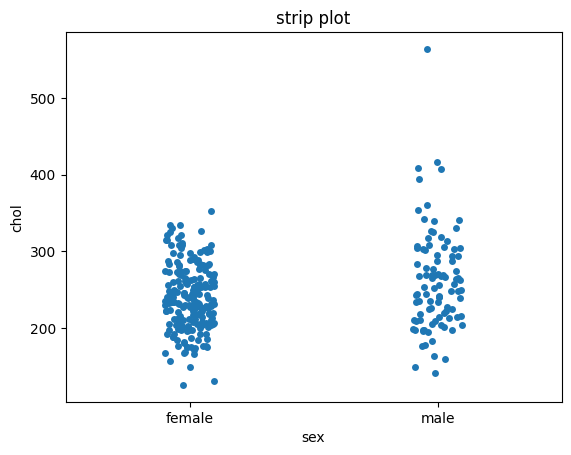

In [35]:
sns.stripplot(x = "sex", y = "chol", data = source)
plt.title("strip plot")
plt.show()

In [36]:
pivot = source.pivot_table(index = "sex", columns="age", values="chol")
pivot = pivot.fillna(0)
pivot

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
sex,,,,,,,,,,,,,,,,,,,,,
female,204.0,182.0,224.0,250.0,193.666667,270.0,196.333333,205.166667,250.0,250.0,...,240.25,247.0,252.833333,248.0,244.0,252.5,0.000000,0.0,0.0,304.0
male,0.0,210.0,183.0,215.0,0.000000,209.5,0.000000,244.000000,237.0,277.0,...,317.75,244.0,354.666667,211.0,239.0,0.0,238.666667,269.0,197.0,0.0


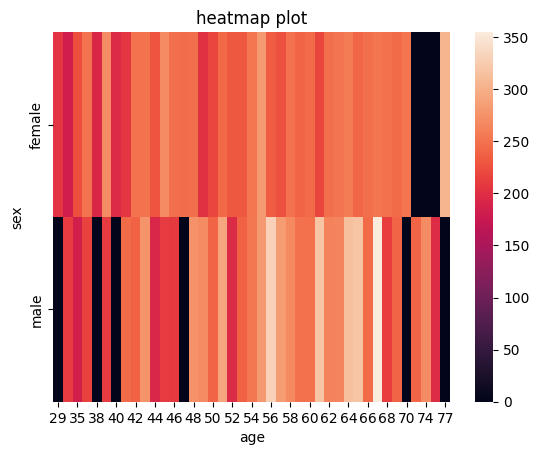

In [37]:
sns.heatmap(pivot)
plt.title("heatmap plot")
plt.show()

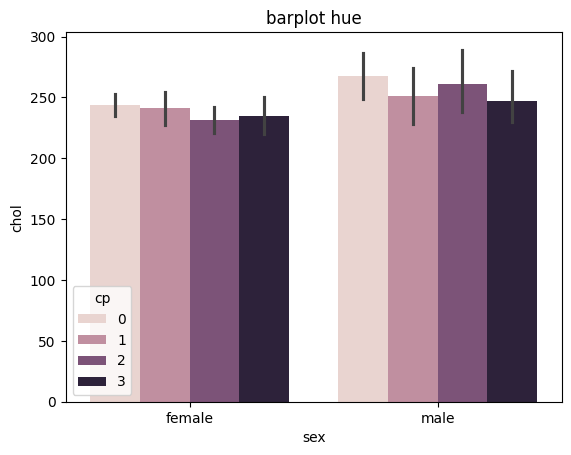

In [38]:
sns.barplot(x = "sex", y = "chol", hue="cp", data = source)
plt.title("barplot hue")
plt.show()

ASSIGNMENT

In [39]:
data = pd.read_csv("netflix.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...,...
103,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
104,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
106,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...


NO 1

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       108 non-null    object
 1   type          108 non-null    object
 2   title         108 non-null    object
 3   director      67 non-null     object
 4   cast          97 non-null     object
 5   country       62 non-null     object
 6   date_added    108 non-null    object
 7   release_year  108 non-null    int64 
 8   rating        108 non-null    object
 9   duration      108 non-null    object
 10  listed_in     108 non-null    object
 11  description   108 non-null    object
dtypes: int64(1), object(11)
memory usage: 10.3+ KB


In [41]:
data["date_added"] = pd.to_datetime(data["date_added"])

In [42]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...,...
103,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,2021-09-22,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
104,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom",2021-09-08,2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,2021-09-07,2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
106,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,2021-09-07,2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...


In [43]:
data[["release_year"]].describe()

,release_year
count,108.000000
mean,2015.462963
std,9.893287
min,1975.000000
25%,2013.000000
50%,2021.000000
75%,2021.000000
max,2021.000000


In [44]:
group = data.groupby("release_year")["type"].count()
group

release_year
1975     1
1978     1
1983     1
1987     1
1993     1
1994     1
1996     1
1997     1
1998     1
2001     2
2002     1
2003     1
2004     2
2005     1
2006     1
2007     1
2008     1
2009     1
2010     2
2011     1
2012     2
2013     3
2014     2
2015     1
2017     2
2018     5
2019     2
2020     8
2021    60
Name: type, dtype: int64

<Axes: xlabel='release_year'>

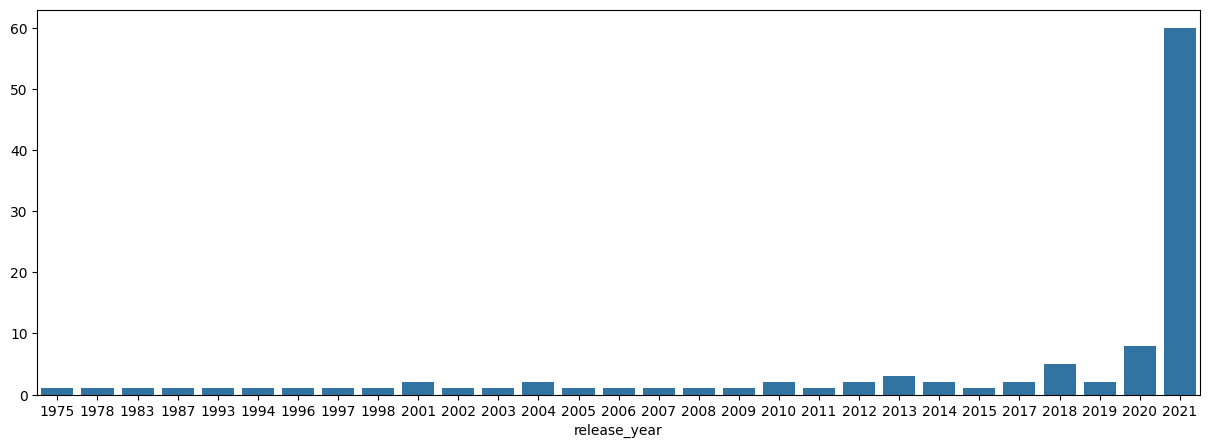

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(x = group.index, y = group.values)

In [46]:
tahun_2018 = data.loc[(data["type"] == "Movie") & (data["release_year"] == 2018)]
tahun_2018

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
79,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...
101,s95,Movie,Show Dogs,Raja Gosnell,"Will Arnett, Ludacris, Natasha Lyonne, Stanley...","United Kingdom, United States",2021-09-08,2018,PG,90 min,"Children & Family Movies, Comedies",A rough and tough police dog must go undercove...
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,2021-09-07,2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."


In [47]:
data["date_added_month"] = data["date_added"].dt.strftime("%m")
data["date_added_day"] = data["date_added"].dt.strftime("%d")
data["date_added_year"] = data["date_added"].dt.strftime("%Y")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",09,25,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",09,24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,09,24,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",09,24,2021
4,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,09,21,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,2021-09-22,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro...",09,22,2021
104,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom",2021-09-08,2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...,09,08,2021
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,2021-09-07,2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do...",09,07,2021
106,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,2021-09-07,2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...,09,07,2021


ASSIGNMENT

In [48]:
df_cause = pd.read_csv("Cause-of-Death-Indonesia.csv")
df_cause

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
675,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
676,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
677,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
678,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


In [50]:
bencana = df_cause.loc[df_cause["Type"] == "Bencana Sosial"]
bencana

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
16,Aksi Teror dan Sabotase,Bencana Sosial,2015,1,0,Profil Kesehatan Indonesia Tahun 2015,Lampiran 6.28,https://pusdatin.kemkes.go.id/download.php?fil...
17,Aksi Teror dan Sabotase,Bencana Sosial,2016,1,13,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
18,Aksi Teror dan Sabotase,Bencana Sosial,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
19,Aksi Teror dan Sabotase,Bencana Sosial,2018,1,18,Profil Kesehatan Indonesia Tahun 2018,Lampiran 6.49,https://pusdatin.kemkes.go.id/download.php?fil...
20,Aksi Teror dan Sabotase,Bencana Sosial,2019,1,3,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
21,Aksi Teror dan Sabotase,Bencana Sosial,2020,1,4,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...
22,Aksi Teror dan Sabotase,Bencana Sosial,2021,1,4,Profil Kesehatan Indonesia Tahun 2021,253,https://www.kemkes.go.id/downloads/resources/d...
124,Bencana kelaparan,Bencana Sosial,2006,1,1,Profil Kesehatan Indonesia Tahun 2006,Lampiran 4.25,https://pusdatin.kemkes.go.id/download.php?fil...
451,Konflik,Bencana Sosial,2009,1,16,Profil Kesehatan Indonesia Tahun 2009,Lampiran 4.27,https://pusdatin.kemkes.go.id/download.php?fil...
452,Konflik,Bencana Sosial,2010,1,33,Profil Kesehatan Indonesia Tahun 2010,Lampiran 4.42,https://pusdatin.kemkes.go.id/download.php?fil...


In [51]:
cause = bencana.groupby("Cause")["Total Deaths"].sum()
cause

Cause
Aksi Teror dan Sabotase                 42
Bencana kelaparan                        1
Konflik                                 83
Konflik Sosial                          66
Konflik Sosial atau Kerusuhan Sosial    69
Name: Total Deaths, dtype: int64

<Axes: ylabel='Cause'>

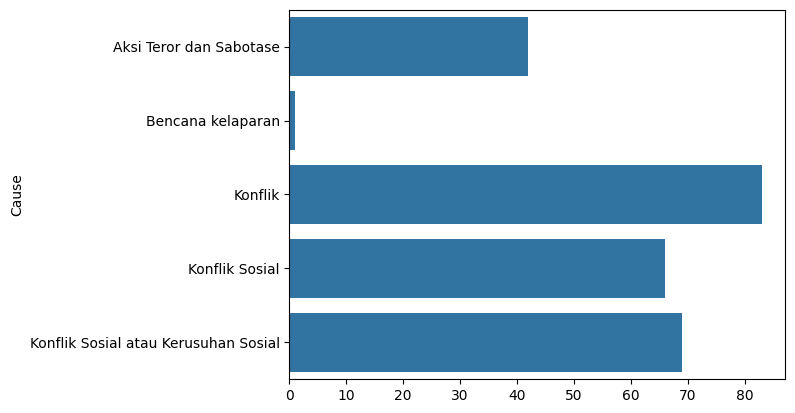

In [53]:
sns.barplot(x = cause.values, y = cause.index)

In [54]:
cause.idxmax()

'Konflik'

In [55]:
cause.idxmin()

'Bencana kelaparan'